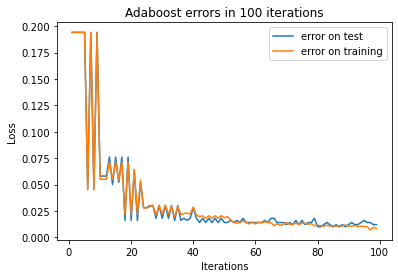

In [1]:
import numpy as np
from typing import Tuple
from IMLearn.metalearners.adaboost import AdaBoost
from IMLearn.learners.classifiers import DecisionStump
from utils import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


def generate_data(n: int, noise_ratio: float) -> Tuple[np.ndarray, np.ndarray]:
    X, y = np.random.rand(n, 2) * 2 - 1, np.ones(n)
    y[np.sum(X ** 2, axis=1) < 0.5 ** 2] = -1
    y[np.random.choice(n, int(noise_ratio * n))] *= -1
    return X, y


noise=0
n_learners=100
train_size=5000
test_size=500
(train_X, train_y), (test_X, test_y) = generate_data(train_size, noise), generate_data(test_size, noise)


adaBoost = AdaBoost(DecisionStump, n_learners).fit(train_X, train_y)
test = []
training = [] 

iterations = np.arange(1, n_learners)
for t in iterations:
    training.append(adaBoost.partial_loss(train_X, train_y, t))
    test.append(adaBoost.partial_loss(test_X, test_y, t))
plt.plot(iterations, test, label='error on test')
plt.plot(iterations, training, label='error on training')
plt.title(f'Adaboost errors in {n_learners} iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

Q1


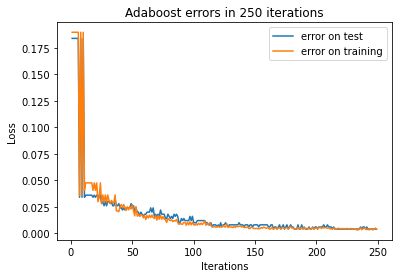

Q2


Q3


Q4


Q5


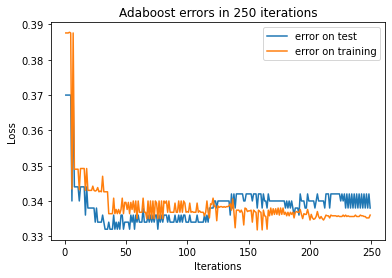

In [3]:
import numpy as np
from typing import Tuple
from IMLearn.metalearners.adaboost import AdaBoost
from IMLearn.learners.classifiers import DecisionStump
from utils import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


def generate_data(n: int, noise_ratio: float) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate a dataset in R^2 of specified size

    Parameters
    ----------
    n: int
        Number of samples to generate

    noise_ratio: float
        Ratio of labels to invert

    Returns
    -------
    X: np.ndarray of shape (n_samples,2)
        Design matrix of samples

    y: np.ndarray of shape (n_samples,)
        Labels of samples
    """
    '''
    generate samples X with shape: (num_samples, 2) and labels y with shape (num_samples).
    num_samples: the number of samples to generate
    noise_ratio: invert the label for this ratio of the samples
    '''
    X, y = np.random.rand(n, 2) * 2 - 1, np.ones(n)
    y[np.sum(X ** 2, axis=1) < 0.5 ** 2] = -1
    y[np.random.choice(n, int(noise_ratio * n))] *= -1
    return X, y


def fit_and_evaluate_adaboost(noise, n_learners=250, train_size=5000, test_size=500):
    (train_X, train_y), (test_X, test_y) = generate_data(train_size, noise), generate_data(test_size, noise)

    # Question 1: Train- and test errors of AdaBoost in noiseless case
    if noise==0: print("Q1")
    adaBoost = AdaBoost(DecisionStump, n_learners).fit(train_X, train_y)
    test = []
    training = [] 
    
    iterations = np.arange(1, n_learners)
    for t in iterations:
        training.append(adaBoost.partial_loss(train_X, train_y, t))
        test.append(adaBoost.partial_loss(test_X, test_y, t))
    plt.plot(iterations, test, label='error on test')
    plt.plot(iterations, training, label='error on training')
    plt.title(f'Adaboost errors in {n_learners} iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#     raise NotImplementedError()

    # Question 2: Plotting decision surfaces
    if noise==0: print("Q2")
    T = [5, 50, 100, 250]
    lims = np.array([np.r_[train_X, test_X].min(axis=0), np.r_[train_X, test_X].max(axis=0)]).T + np.array([-.1, .1])
    
    model_names = [str(f'number iteration: {i}') for i in T]
    lab_5_decision(adaBoost,test_X,test_y,T,model_names,lims,2,2)
#     raise NotImplementedError()

    # Question 3: Decision surface of best performing ensemble
    if noise==0: print("Q3")
    model_names = [str(f'number iteration: {np.argmin(test)}, accuracy: {1-np.min(test)}')]
    lab_5_decision(adaBoost,test_X,test_y,[np.argmin(test)],model_names,lims,1,1)
#     raise NotImplementedError()

    # Question 4: Decision surface with weighted samples
    if noise==0: print("Q4")
    model_names = [str(f'number iteration: {n_learners}')]
    Dt = adaBoost.D_[n_learners-1]
    lab_5_decision(adaBoost,test_X,test_y,[n_learners-1],model_names,lims,1,1,(Dt/np.max(Dt) * 40))
#     raise NotImplementedError()


def lab_5_decision(adaBoost,test_X,test_y,T,model_names,lims,num_rows,num_cols,weights=np.array([])):
    symbols = np.array(["circle", "x"])
#     lims-= np.array([-.12, .12])
    
    if weights.size==0:
        weights=np.ones(test_X.shape[0])
        
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=[rf"$\textbf{{{m}}}$" for m in model_names],
                    horizontal_spacing = 0.1, vertical_spacing=.1)
    for i, t in enumerate(T):
        fig.add_traces([decision_surface_ex4(adaBoost.partial_predict,t, lims[0], lims[1], showscale=False),
                        go.Scatter(x=test_X[:,0], y=test_X[:,1], mode="markers", showlegend=False,
                                   marker=dict(size = weights,color=test_y[:].astype(int), symbol=symbols[test_y[:].astype(int)], colorscale=[custom[0], custom[-1]], 
                                               line=dict(color="black", width=1)) )], 
                       rows=(i//num_cols) + 1, cols=(i%num_cols)+1)

    fig.update_xaxes(visible=False). update_yaxes(visible=False).show()

    
def decision_surface_ex4(predict,t, xrange, yrange, density=120, dotted=False, colorscale=custom, showscale=True):
    xrange, yrange = np.linspace(*xrange, density), np.linspace(*yrange, density)
    xx, yy = np.meshgrid(xrange, yrange)
    pred = predict(np.c_[xx.ravel(), yy.ravel()],t)

    if dotted:
        return go.Scatter(x=xx.ravel(), y=yy.ravel(), opacity=1, mode="markers", marker=dict(color=pred, size=1, colorscale=colorscale, reversescale=False), hoverinfo="skip", showlegend=False)
    return go.Contour(x=xrange, y=yrange, z=pred.reshape(xx.shape), colorscale=colorscale, reversescale=False, opacity=.7, connectgaps=True, hoverinfo="skip", showlegend=False, showscale=showscale)
    
if __name__ == '__main__':
    np.random.seed(0)
    fit_and_evaluate_adaboost(0)
    print("Q5")
    fit_and_evaluate_adaboost(0.4)
#     raise NotImplementedError()